In [ ]:
import numpy as np
import pandas as pd
import time 
import random
from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
ds.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Import Data

In [ ]:

x = ds.drop(['Outcome'], axis = 1).values
y = ds['Outcome'].values
y = y.reshape(y.shape[0], 1)
#Spliting Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=42)
#Standardize data
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
x_train_std = scale.fit_transform(x_train)
x_test_std = scale.transform(x_test)


In [ ]:
print(x.shape)

(768, 8)


In [ ]:
print(y.shape)

(768, 1)


In [ ]:

y_train=y_train.tolist()

In [ ]:
print(len(y_test))

192


In [ ]:
print(y_train.count([1]))

199


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

# Feed Forward

In [ ]:
def FF(HL,OL,W,B,x):
  INL=len(x)
  hidden_layer=np.zeros((HL))
  output_layer=np.zeros((OL))
  witr=0
  bitr=0
  for i in range(HL):
    sum=0
    for j in range(INL):
      sum=sum+(x[j]*W[witr])
      witr=witr+1
    sum=sum.sum()
    hidden_layer[i]=sigmoid(sum+B[bitr])
    bitr=bitr+1

  for i in range(OL):
    output=0
    for j in range(HL):
      output=output+(hidden_layer[j]*W[witr])
      witr = witr + 1
    output=output.sum()
    output_layer[i]=sigmoid(output+B[bitr])
    bitr=bitr+1
  return output_layer

In [ ]:
NIL=8
HL=18
OL=1
#144+18+19=181

In [ ]:
s=[0, -7.494110173701986, 0.02580471629082624, -1.416231274744585, 89.08948191685687, -31.123794597015216, -15.360352983536123, -82.01993042463076, 8.39078084310988, -51.55942883255037, -0.07433651854093658, -3.2856014702521636, 3.163319236544354, 34.5024038437115, 0.010108351649283462, -51.69712359428136, 13.78058638891122, 53.81080476825638, -26.70139019988659, -13.19707184134996, -2.637768832245555, -4.008921196129098, -99.679357676593, 2.976762783866588, 0.6227429812950827, -99.8712868473062, -0.0394798872172541, -13.03007060725927, -52.59664871371666, 0.12774273881655002, -1.1889408016383938, 60.69980075046726, -91.10344572857709, -7.057866272897603, 0.058282187302862394, -12.35950737642972, -3.8239810450171787, 2.053494588216921, 15.977842638329735, 8.517836586860318, 3.3153197678575874, 2.182982042654443, -1.319500736998634, 20.61920343693835, 18.68629028733797, -65.19477295314846, 62.994326471332634, 29.49214601759166, 3.1366816884994146, 27.99499408609164, -0.669957141664688, -25.101887789356493, 86.42169688629035, -21.459519867260912, -15.469849179230613, -92.1365093637895, 20.18679553685783, 2.443703114829294, -0.6872228052897098, 22.834560913669872, 29.52726243218638, -1.7198418006666598, 2.165074432469303, -19.08128878855784, 0, -1.3628786429072537, -23.604201309971174, 0.9107630953662964, -14.944924064462038, -8.109907852905398, -17.79582707882542, -2.1225730066250876, 83.10082422852763, 51.97370799268316, -6.494811100834755, -1.0336590889432946, 0.10016347309748617, -12.383622327088275, -17.307645483417954, 39.92265966291287, 5.758069577754514, 63.96401285843558, 42.8112265330039, -71.30728786635562, 0.039998624483304844, 1.681035575086429, 1.056894462383641, 0.6662353690034241, -3.1701229942436373, 0.029830749031124662, -0.44566117430520213, -2.7105305926051417, -7.466100001311493, 2.554081801519303, 3.506390077636134, -75.52353879601351, -4.3663784957394265, 49.00745486758763, -20.489083709384023, -29.092439481356582, 5.4533729397452575, 83.37308208897619, 85.24835681543293, 2.9440656376935075, 3.5424336742947564, -4.0706631902079655, 19.913250289732584, 88.59598493370943, -1.0902409031177598, 56.71976376966876, -6.600015611896526, -83.96226744941299, -42.467903126852896, 4.387228488596485, 6.214681974717539, -47.35966049031786, -5.426487677983477, -71.4620419416536, 6.796451127057151, 5.770253412063102, -3.9075783473984367, -56.8963908604644, 98.08025915444144, 23.608998698543058, -60.53999750699148, 1.701436643541655, 1.8020331100918872, -5.672334942966927, 12.05926549990403, -10.435755870411851, -33.12720067420074, 10.51028091928558]

In [ ]:
i=s[:121]
print(len(i))
v=i[0:110]
print(len(v))
print(i[109])
print(i[110])
z=i[110:121]
print(len(z))

121
110
56.71976376966876
-6.600015611896526
11


In [ ]:
print(len(x_train_std))

33


In [ ]:
A=FF(HL,OL,v,z,x_train_std[21])
print(A)

[0.11367365]


In [ ]:
print(A[0])

0.11367364870448061


# Waterflow Algorithm

In [ ]:
from numpy import zeros,transpose
from math import inf,pi,cos
from random import random,uniform,randrange

def WFO(alg, prob):
    fb = inf
    con = zeros((alg.max_nfe,1))
    X = zeros((alg.NP, prob.dim))
    F = zeros((alg.NP, 1))
    for i in range(alg.NP): # initialization
        for j in range(prob.dim):
            X[i,j] = uniform(prob.lb[j],prob.ub[j])            
        F[i] = prob.fobj(X[i,:])
        if F[i]<fb:
            fb = F[i]
            xb = X[i,:]            
        con[i] = fb
    Y = zeros((alg.NP, prob.dim))
    nfe = i
    while nfe < alg.max_nfe-1:
        if random() < alg.pl: # laminar flow
            k = randrange(alg.NP)
            d = xb - X[k,:]
            for i in range(alg.NP):
                Y[i,:] = X[i,:] + random()*d
                for j in range(prob.dim):
                    if not prob.lb[j] <= Y[i,j] <= prob.ub[j]:
                        Y[i,j] = X[i,j]
                        
        else: # turbulent flow
            for i in range(alg.NP):
                Y[i,:] = X[i,:]
                k = randrange(alg.NP)
                while k==i:
                    k = randrange(alg.NP)
                j1 = randrange(prob.dim)
                if random() < alg.pe: # spiral flow
                    theta = uniform(-pi, pi)
                    Y[i,j1] = X[i,j1]+abs(X[k,j1]-X[i,j1])*theta*cos(theta)
                    if not prob.lb[j1] <= Y[i,j1] <= prob.ub[j1]:
                        Y[i,j1] = X[i,j1] 
                else:
                    j2 = randrange(prob.dim)
                    while j2==j1:
                        j2 = randrange(prob.dim)
                    Y[i,j1] = prob.lb[j1] + (prob.ub[j1]-prob.lb[j1])*(X[k,j2]-prob.lb[j2])/(prob.ub[j2]-prob.lb[j2])
                    
        for i in range(alg.NP): # evaluation and evolution
            f = prob.fobj(Y[i,:])
            if f < F[i]:
                F[i] = f
                X[i,:] = Y[i,:]
                if f < fb:
                    fb = f
                    xb = X[i,:]
            nfe += 1
            con[nfe] = fb                        
            
    return fb, xb, con

The minimal objective function value: 0.1370660989557388
The best solution:
[-0.99410059  0.91372141  0.97080057  0.61581963  0.48135288  0.93718112
  0.97499634 -0.46640053  0.36134606 -0.99267024  0.96957117  0.99921703
 -0.99765351 -0.3184779  -0.99800032  0.96510415  0.94714777  0.60021314
 -0.52949466  0.968605    0.96933133 -0.97527126  0.94337771 -0.88912669
  0.9868214  -0.808676    0.92863556  0.19299129  0.0190254  -0.83190754
  0.99466733 -0.5587645   0.93242105  0.90674133  0.85515499  0.67276139
  0.88515514 -0.99231666 -0.99887697 -0.99856636  0.96656921  0.99925291
 -0.97841223  0.46639963  0.04914748  0.66596434 -0.98546871  0.99964494
 -0.97860872 -0.65945771  0.9925265  -0.88785443  0.72985784 -0.17570931
 -0.99874399  0.33037973  0.35282149 -0.90602685  0.99200881  0.98584717
  0.94467147  0.99901784 -0.94080511  0.97158591  0.98580048  0.9613151
 -0.74644838 -0.95548118 -0.99282008 -0.75359855 -0.96678873 -0.69685073
  0.34436284 -0.58816329 -0.21864924 -0.70563336 

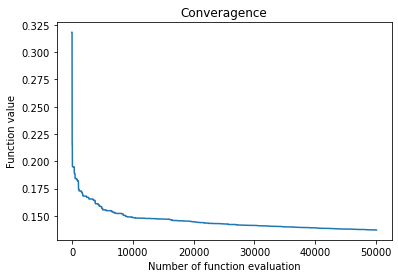

In [ ]:
from math import pi, cos
from matplotlib import pyplot

# set the algorithmic parameters
class alg:
    NP = 50
    max_nfe = 50050
    pl = 0.3
    pe = 0.7
    
# set the problem's parameters
n = 181   # dimensional number
class prob:
    dim = n
    lb = [-1]*n
    ub = [1]*n
    
    # the objective function to be minimized,
    # for example 1 , uni-mode sphere function, f = sum(x^2)
##    def fobj(x): 
##        f = 0
##        for i in x:
##            f += i**2
##        return f
    
    # for example 2, multi-mode Rastrign function, f =sum(x^2-10*cos(2*pi*x)) + 10*n  
    def fobj(solution):
      fitness=0
      w=(NIL*HL)+(HL*OL)
      b=(NIL*HL)+HL+(HL*OL)+OL
      W=solution[0:w]
      B=solution[w:b]
      for idx,x in enumerate(x_train_std):
        actualValue=FF(HL,OL,W,B,x)

        fitness+=pow((actualValue[0]-y_train[idx][0]),2)

      fitness=fitness/len(x_train)
      
      return fitness


    # for example 3, CEC2022 single objective benchmark problems
##    def fobj(x):        
##        f = cec22_test_func(x = x, nx = n, mx = 1, func_num = 2)
##        return f
    
fb, xb, con = WFO(alg, prob)
print('The minimal objective function value: {}'.format(fb))
print('The best solution:')
print(xb)
pyplot.plot(con)
pyplot.xlabel('Number of function evaluation')
pyplot.ylabel('Function value')
pyplot.title('Converagence')
pyplot.show()


In [ ]:
u=xb
solution=u.tolist()
print(len(solution))
print(solution)

181
[-0.9941005935607485, 0.9137214070112832, 0.9708005666553733, 0.6158196312890984, 0.48135288135251775, 0.9371811212582921, 0.9749963445199457, -0.46640053239421986, 0.36134605872942593, -0.992670243645256, 0.9695711725084876, 0.9992170315220213, -0.997653511589629, -0.31847789980964236, -0.9980003186543868, 0.9651041549380187, 0.9471477668986086, 0.6002131359464896, -0.5294946625634166, 0.9686049956179423, 0.9693313260032793, -0.9752712554730222, 0.9433777058150062, -0.8891266869676919, 0.9868213964822684, -0.8086760015607177, 0.9286355614699219, 0.19299128672434884, 0.01902539682024304, -0.8319075374539415, 0.9946673283165313, -0.5587644973997108, 0.9324210547484354, 0.9067413254112653, 0.8551549873169197, 0.6727613905375327, 0.8851551383732216, -0.992316662221949, -0.9988769673103086, -0.9985663561374676, 0.9665692128495429, 0.999252910630121, -0.9784122293697776, 0.4663996307846406, 0.04914747953166526, 0.6659643427315732, -0.9854687129436482, 0.999644936189808, -0.9786087155187

In [ ]:
def Test(HL,OL,W,B,x):
  INL=len(x)
  hidden_layer=np.zeros((HL))
  output_layer=np.zeros((OL))
  witr=0
  bitr=0
  for i in range(HL):
    sum=0
    for j in range(INL):
      sum=sum+(x[j]*W[witr])
      witr=witr+1
    sum=sum.sum()
    hidden_layer[i]=sigmoid(sum+B[bitr])
    bitr=bitr+1

  for i in range(OL):
    output=0
    for j in range(HL):
      output=output+(hidden_layer[j]*W[witr])
      witr = witr + 1
    output=output.sum()
    output_layer[i]=sigmoid(output+B[bitr])
    bitr=bitr+1
  return output_layer




In [ ]:
min_key=min(B.keys(), key=(lambda k: B[k]))

In [ ]:
w=(NIL*HL)+(HL*OL)
b=(NIL*HL)+HL+(HL*OL)+OL    
W=solution[0:w]
B=solution[w:b]
print(len(W))
print(B)

162
[-0.49498110686329083, 0.2415144923280062, -0.9982685843996033, 0.8793985656830797, -0.4485633151806321, 0.9429745479332344, -0.9931261177038958, -0.9720827746600786, 0.944893631920647, -0.9891185378013836, -0.4228477043310416, 0.7538438636667449, 0.9791771235365336, 0.9424807848172061, 0.9381835037734038, -0.809132029888379, 0.9478295868176608, -0.9992680144502195, -0.9959618939895197]


In [ ]:
a=Test(HL,OL,W,B,x_test_std[7])
print(a)


[1.]


In [ ]:
R=0
for i in range(len(y_train)):
  p=Test(HL,OL,W,B,x_train_std[i])
  if y_train[i][0]==0:
    if p[0]<0.5:
      R+=1
  if y_train[i][0]==1:
    if p[0]>0.5:
      R+=1


In [ ]:
print((R*100)/len(y_train))

79.6875


In [ ]:
def prediction(HL,OL,W,B,x):
  predict=[]
  s=[]
  for i in range(len(x)):
    a=Test(HL,OL,W,B,x[i])
    if a[0]>0.5:
      predict.append(1)
    else:
      predict.append(0)
    
    
  
  return predict

In [ ]:
pred=prediction(HL,OL,W,B,x_test_std)
print(f"Predict :{pred}")
y_true = sum(y_test.tolist(), [])
print(f"true y:{y_true}")

acc=0
for i in range(len(y_test)):
  if pred[i]==y_true[i]:
    acc+=1

print(f"accuracy:{acc/len(y_test)*100}%")

Predict :[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]
true y:[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1

In [ ]:
p=[[2.3443797239678989e-07, 1.0], [1.0, 5.790537731467655e-12], [4.760185995141387e-07, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [1.0, 7.49479046619701e-09], [1.0, 5.790537731467655e-12], [0.9999997593963258, 1.7827783105267858e-14], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [4.760185995141387e-07, 1.0], [1.0, 7.49479046619701e-09], [0.9999999999998617, 7.413173583065964e-08], [1.0, 7.49479046619701e-09], [3.295837933196582e-19, 1.0], [4.760185995141387e-07, 1.0], [1.0, 5.790537731467655e-12], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [1.0, 5.790537731467655e-12], [1.0, 7.49479046619701e-09], [2.735378606784197e-13, 1.0], [1.0, 7.49479046619701e-09], [4.760185995141387e-07, 1.0], [1.0, 7.49479046619701e-09], [4.7601859951413703e-07, 1.0], [1.0, 5.790537731467655e-12], [0.9999997594005218, 1.7827926890587977e-14], [2.3443797239678989e-07, 1.0], [0.9999999999997193, 1.3777059110728068e-17], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [1.0, 7.49479046619701e-09], [2.3441849876730426e-07, 1.0], [0.9999997593963258, 1.7827783105267858e-14], [2.3443797239678989e-07, 1.0], [0.999997046667274, 1.0], [3.4230559529451456e-19, 1.0], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [2.7353786067445575e-13, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [0.9999999999998619, 7.412144614465116e-08], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [3.2958383525020503e-19, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [4.760185995141387e-07, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 5.790537748567615e-12], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [0.9999997593963258, 1.7827783105267858e-14], [3.295837933196582e-19, 1.0], [4.760185995141387e-07, 1.0], [0.9999997593963258, 1.7827783105267858e-14], [1.0, 5.790537731467655e-12], [1.0, 7.49479046619701e-09], [1.0, 5.790537731467655e-12], [2.735378606784197e-13, 1.0], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [4.760185995141387e-07, 1.0], [1.0, 7.49479046619701e-09], [4.7601859963200897e-07, 1.0], [1.0, 7.49479046619701e-09], [2.730081969202577e-13, 1.0], [1.0, 7.49479046619701e-09], [0.9999999999998617, 7.413173838927611e-08], [2.824682922217676e-13, 1.0], [1.0, 5.790537731467655e-12], [1.0, 7.49479046619701e-09], [1.0, 7.494780457447032e-09], [1.0, 7.49479046619701e-09], [4.760185995141387e-07, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [1.2482862984116327e-18, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 7.494790466200846e-09], [1.0, 5.790537731467655e-12], [1.0, 7.49479046619701e-09], [1.0, 5.790537731467655e-12], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [4.7601836872318313e-07, 1.0], [2.3443797239678989e-07, 1.0], [0.9999999999999998, 3.6456980727045307e-10], [1.0, 7.49479046619701e-09], [1.0, 5.790537731467655e-12], [2.3443797239678989e-07, 1.0], [3.561895408985392e-19, 1.0], [0.9999999999998617, 7.413141488936635e-08], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [0.999997046667274, 1.0], [1.0, 7.49479046619701e-09], [2.3443797226534723e-07, 1.0], [0.9999999999997193, 1.377389407325726e-17], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [2.735371990190059e-13, 1.0], [1.0, 7.49479046619701e-09], [3.295837933196582e-19, 1.0], [1.0, 5.790537731467655e-12], [0.9999999954925718, 1.1219721194964509e-13], [4.760185995141387e-07, 1.0], [0.9999997593963258, 1.7827783105267858e-14], [0.9999997593963258, 1.7827783105267858e-14], [1.0, 5.790537731467655e-12], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 5.790537731467655e-12], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [2.735378606754956e-13, 1.0], [2.344379723967903e-07, 1.0], [2.3443797239678989e-07, 1.0], [4.760185995141387e-07, 1.0], [0.9999997593963258, 1.7827783105267858e-14], [4.7601861964494985e-07, 1.0], [1.0, 5.790537731467655e-12], [1.0, 1.4646590413208634e-12], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [0.9999999999998617, 7.413173838927611e-08], [0.9999999999997193, 1.3773894071084169e-17], [2.3443797239678989e-07, 1.0], [1.0, 7.416891915703537e-09], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [0.9999997593963258, 1.7827783105267858e-14], [2.735378606784197e-13, 1.0], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [4.7601859947178284e-07, 1.0], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [4.760185995141387e-07, 1.0], [0.9999999999997216, 1.382760290185998e-17], [1.0, 7.49479046619701e-09], [2.735378606784197e-13, 1.0], [1.0, 7.494787237171255e-09], [0.9999997593963287, 1.7827783200580683e-14], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [2.735378606784197e-13, 1.0], [1.0, 5.790537731467655e-12], [5.186223429698876e-06, 1.0], [1.0, 7.49479046619701e-09], [3.2963276408309863e-19, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [0.9999997593963258, 1.7827783105267858e-14], [4.760185995141387e-07, 1.0], [0.999999759396326, 1.7827783109247703e-14], [2.3443797239678989e-07, 1.0], [2.3443797239533066e-07, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [3.539949630789169e-14, 1.0], [4.760185995141387e-07, 1.0], [4.760185995141387e-07, 1.0], [0.9999999999997193, 1.3773894071096696e-17], [0.9999999999997193, 1.3773894071084169e-17], [1.0, 7.49479046619701e-09], [2.735378606784197e-13, 1.0], [4.760185995141387e-07, 1.0], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [0.9999997593963258, 1.7827783105267858e-14], [1.0, 5.399724176787439e-09], [3.2958381859094635e-19, 1.0], [1.0, 5.790537731467655e-12], [2.3443797239678989e-07, 1.0], [2.736071297671768e-13, 1.0], [1.0, 7.49479046619701e-09], [0.9999999999998617, 7.413173838927611e-08], [1.0, 7.49479046619701e-09], [4.760185995141387e-07, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [1.0, 7.494790466196905e-09], [2.3443797239678989e-07, 1.0], [4.760185995141387e-07, 1.0], [0.9999997593963258, 1.7827783105267858e-14], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [1.0, 5.790537731467655e-12], [1.0, 7.49479046619701e-09], [1.0, 7.49479046619701e-09], [0.9999997597973544, 1.784154246233934e-14], [4.760185995141387e-07, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [0.9999999999997193, 1.3773894071084169e-17], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 5.790537731467655e-12], [1.0, 5.790537731467655e-12], [0.9999999999997193, 1.3773916445774456e-17], [1.0, 5.7905377175175346e-12], [1.0, 7.49479046619701e-09], [0.9999997593963258, 1.7827783105640535e-14], [1.0, 7.49479046619701e-09], [0.9999999999997193, 1.3773894071084169e-17], [4.760185994289154e-07, 1.0], [4.760185995141387e-07, 1.0], [1.0, 5.790537731467655e-12], [0.9999999999997193, 1.3773894071084169e-17], [0.9999997594030715, 1.782801427057929e-14], [0.9999999999997193, 1.3773894071084169e-17], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [0.9999999999997193, 1.3773894071148567e-17], [2.3443797239678989e-07, 1.0], [4.760185995141387e-07, 1.0], [1.0, 7.49479046619701e-09], [0.9999999999998492, 1.8358616739546913e-17], [2.3443797239678989e-07, 1.0], [2.3443792937421956e-07, 1.0], [1.0, 7.49479046619701e-09], [4.760185995141387e-07, 1.0], [2.735378606784197e-13, 1.0], [1.0, 7.49479046619701e-09], [2.3443797239678989e-07, 1.0], [1.0, 5.790537731467655e-12], [1.0, 7.494790466200632e-09], [0.9999997593963258, 1.7827783105267858e-14], [0.9999997593963258, 1.7827783105267858e-14], [0.9999999999997193, 1.3773894071084169e-17], [0.9999999999997193, 1.3773894071086518e-17], [2.3443797239678989e-07, 1.0], [0.9999999999997193, 1.3773894071084169e-17], [2.8247268646226163e-13, 1.0], [4.760185922590398e-07, 1.0], [0.9999997593963258, 1.7827783105267858e-14], [1.0, 7.493736721731287e-09], [4.760185995141387e-07, 1.0], [2.3443797239678989e-07, 1.0], [4.760185995142792e-07, 1.0], [1.0, 7.49479046619701e-09], [0.9999997593963258, 1.7827783105267858e-14], [1.0, 5.790537731467655e-12], [3.295837933196582e-19, 1.0], [1.0, 5.7905377314674905e-12], [1.0, 5.790539620623675e-12], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 7.492433652437726e-09], [2.3443797239678989e-07, 1.0], [2.3443797239678989e-07, 1.0], [1.0, 7.49479046619701e-09], [4.760185995141387e-07, 1.0], [4.760185995141387e-07, 1.0], [5.0873878446689e-18, 1.0]]
for i in range(len(pred)):
  if p[i][0] and p[i][1] >0.5:
    print(i)
  